# Temporal Demand Patterns and Seasonality

To monitor the operational performance of the vehicle fleet in Philadelphia in the year 2016, this notebook will visualize how the fleet usage varies per weekday, per week and during the whole year.

In [12]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Import dataset
trips_hourly = pd.read_parquet('../../data/trips_hourly_date_information.parquet')

# Fleet Usage

In [14]:
#Create feature of starting and ongoing trips per hour
trips_hourly["ongoing_trips_total"] = trips_hourly["trips_starting"] + trips_hourly["trips_prev_active"]

In [15]:
#Group by weekday
weekday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trips_hourly_weekday = trips_hourly.groupby(["day_of_year","day_of_week"])["ongoing_trips_total"].sum()
trips_hourly_weekday = pd.DataFrame(trips_hourly_weekday)

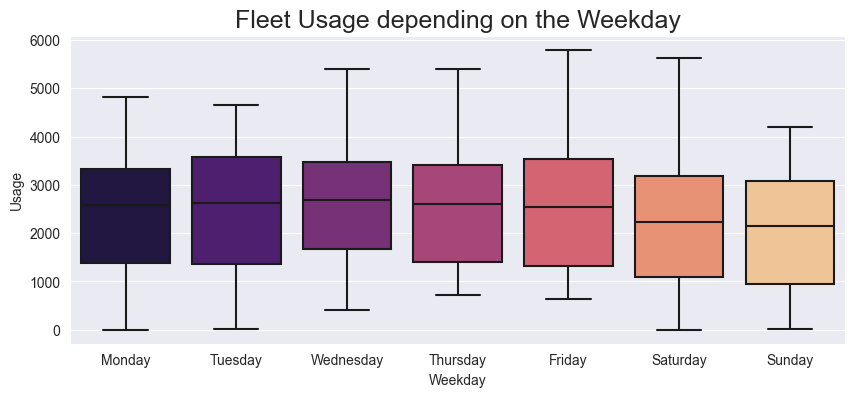

In [16]:
#Displaying values graphically
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=trips_hourly_weekday.index.get_level_values(1), y=trips_hourly_weekday["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Weekday", fontsize=18, fontname="Arial")
ax.set_xlabel("Weekday")
ax.set_ylabel("Usage")
ax.set_xticklabels(weekday)
plt.show()
#ax.figure.savefig("../../figures/Weekday_Usage.png")

In [17]:
#Group by hour
time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
trips_hourly_hour = trips_hourly.groupby(["day_of_year","hour"])["ongoing_trips_total"].sum()
trips_hourly_hour = pd.DataFrame(trips_hourly_hour)

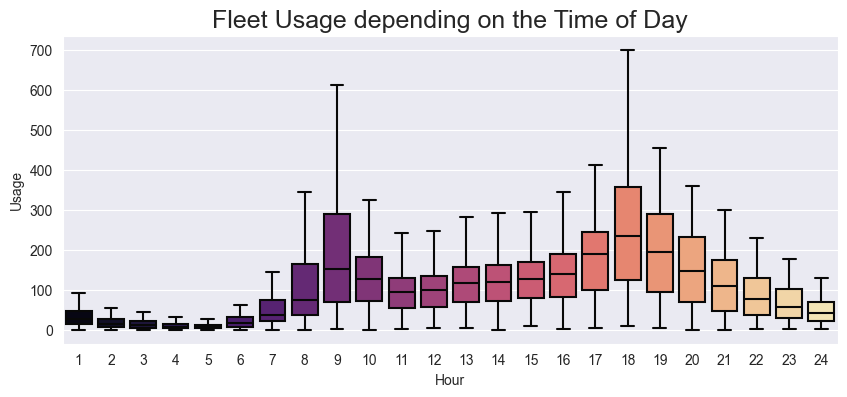

In [18]:
#Displaying values graphically
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=trips_hourly_hour.index.get_level_values(1), y=trips_hourly_hour["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Time of Day", fontsize=18, fontname="Arial")
ax.set_xlabel("Hour")
ax.set_ylabel("Usage")
ax.set_xticklabels(time)
plt.show()
#ax.figure.savefig("../../figures/Time_Usage.png")

In [19]:
#Group by month and plot
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
trips_hourly_month = trips_hourly.groupby(["day_of_year","month"])["ongoing_trips_total"].sum()
trips_hourly_month = pd.DataFrame(trips_hourly_month)

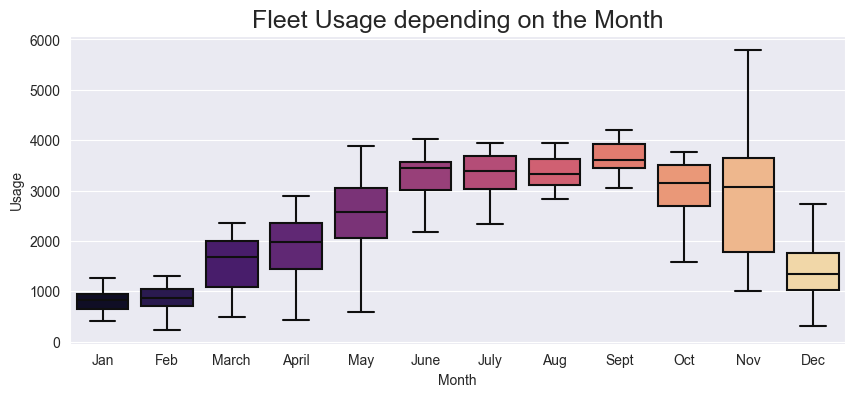

In [20]:
#Displaying values graphically
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=trips_hourly_month.index.get_level_values(1), y=trips_hourly_month["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Month", fontsize=18, fontname="Arial")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")
ax.set_xticklabels(months)
plt.show()
#ax.figure.savefig("../../figures/Month_Usage.png")

# Weather in Philadelphia

In [21]:
#Import data
trips_df = pd.read_parquet("../../data/bike_trips_cleaned.parquet")
trips_df.head(3)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,end_station_name,start_station_name,duration,start_lat,start_lon,end_lat,end_lon,distance,speed,average_time,date_time,max_temp,min_temp,precip
index,,,,,,,,,,,,,,,,,,,,
0,2016-01-01 00:04:00,2016-01-01 00:14:00,3046,3041,3564,Indego30,"Girard Station, MFL",2nd & Market,0 days 00:10:00,39.949895,-75.143749,39.969241,-75.136180,1.005648,6.033888,2016-01-01 00:09:00,2016-01-01,6.7,6.7,0.0
1,2016-01-01 00:07:00,2016-01-01 00:29:00,3028,3019,2629,Indego30,6th & Race,4th & Bainbridge,0 days 00:22:00,39.940735,-75.149370,39.954694,-75.149496,0.397798,1.084905,2016-01-01 00:18:00,2016-01-01,6.7,6.7,0.0
2,2016-01-01 00:14:00,2016-01-01 00:27:00,3007,3066,3430,Indego30,19th & Lombard,"11th & Pine, Kahn Park",0 days 00:13:00,39.945123,-75.159952,39.945664,-75.173272,1.480278,6.832050,2016-01-01 00:20:30,2016-01-01,6.7,6.7,0.0


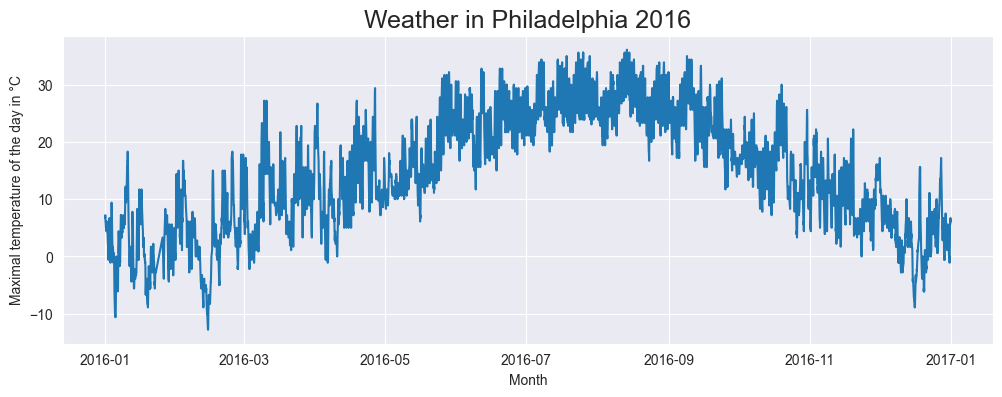

In [22]:
#Displaying values graphically
plt.subplots(figsize=(12, 4))
plt.grid(True)
plt.plot(trips_df["date_time"],trips_df["max_temp"])
plt.xlabel("Month")
plt.ylabel("Maximal temperature of the day in °C")
plt.title("Weather in Philadelphia 2016", fontsize=18, fontname="Arial")
plt.show()
#ax.figure.savefig("../../figures/Weather.png")

Looking at the plots showing the fleet usage and the weather in Philadelphia in 2016, one can infer that the demand rises with the temperature and peaks from July to September when the temperature ranges between 20 and 30°C. <p>
June, as well as October and November, also show high bike rental numbers and warm temperatures. March to April shows a rising demand in bike rentals, beginning when the temperature starts to rise over 0°C permanently. <p> Meanwhile, the demand during the winter months (December-February) is lower when the temperature starts falling under 0°C.